# Content

#### 1. Importing libraries & Dataset
#### 2. Data Wrangling- Weather 
            01. Data Types
            02. Missing Values
            03. Duplicates
            04. Outliers
#### 3. Merging with Delays dataset
#### 4. Aggregating columns
           

## 1 Importing Libraries/Dataset

In [69]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [70]:
#importing weather dataset
path=r'/Users/Amaikuru/Desktop/Toronto Bus Delays'
#importing weather data
weather=pd.read_csv(os.path.join(path, '02 Data','Original', 'toronto_weather.csv'))

In [71]:
#importing delays data
df=pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'stops_wrangled.pkl'))

## 2 Data Wrangling- Weather

In [72]:
weather.head()

,date,max_temperature,avg_temperature,min_temperature,min_windchill,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,precipitation,rain,snow,snow_on_ground
0,7/31/22,28.4,22.6,16.8,NaN,90,68.0,46,25,14.0,3,24100,24100.0,24100,24100,0.0,0.0,0.0,NaN
1,7/30/22,27.1,21.3,15.5,NaN,92,67.5,43,24,15.0,6,24100,24100.0,24100,24100,0.0,0.0,0.0,NaN
2,7/29/22,28.9,21.7,14.5,NaN,87,60.0,33,35,20.0,5,24100,24100.0,24100,24100,0.0,0.0,0.0,NaN
3,7/28/22,29.5,24.2,18.9,NaN,100,67.5,35,39,22.0,5,24100,23233.3,20100,16100,0.8,0.8,0.0,NaN
4,7/27/22,26.2,21.1,16.0,NaN,99,75.0,51,20,10.5,1,24100,24100.0,24100,24100,0.0,0.0,0.0,NaN


In [73]:
weather.shape

(577, 19)

In [74]:
weather.describe()

,max_temperature,avg_temperature,min_temperature,min_windchill,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,precipitation,rain,snow,snow_on_ground
count,577.000000,577.000000,577.000000,205.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,571.000000,571.000000,573.000000,159.000000
mean,13.950607,9.224419,4.499653,-12.765854,85.727903,67.674177,49.620451,28.053726,16.916811,5.779896,24111.958406,22067.631369,20275.216638,16438.474870,2.081611,1.722242,0.411867,5.622642
std,11.696545,11.013643,10.615124,6.917852,12.081342,12.519516,15.605259,9.883640,6.423496,4.445083,2728.281500,3612.234795,4751.173210,8792.814484,5.380562,5.065672,1.884942,7.134937
min,-13.100000,-17.100000,-21.200000,-34.000000,45.000000,34.000000,16.000000,10.000000,5.500000,0.000000,6400.000000,1600.000000,3200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.800000,0.540000,-2.900000,-18.000000,78.000000,60.000000,39.000000,20.000000,11.500000,3.000000,24100.000000,21620.800000,16100.000000,8100.000000,0.000000,0.000000,0.000000,0.500000
50%,14.800000,9.300000,4.400000,-11.000000,87.000000,68.000000,49.000000,27.000000,16.000000,4.000000,24100.000000,23900.000000,21700.000000,19300.000000,0.000000,0.000000,0.000000,2.000000
75%,24.400000,19.350000,14.100000,-7.000000,97.000000,76.500000,59.000000,34.000000,20.500000,8.000000,24100.000000,24100.000000,24100.000000,24100.000000,1.200000,0.600000,0.000000,8.000000
max,35.500000,27.540000,23.700000,-1.000000,100.000000,100.000000,100.000000,67.000000,41.500000,22.000000,80500.000000,26450.000000,52300.000000,24100.000000,56.000000,56.000000,29.200000,32.000000


In [75]:
#for analysis I will only use the date, temperature and precipitation, and avg visibility columns 
weather=weather[['date','max_temperature','avg_temperature','min_temperature','avg_visibility','precipitation']]

### 01 Data Types

In [76]:
weather.dtypes

date                object
max_temperature    float64
avg_temperature    float64
min_temperature    float64
avg_visibility       int64
precipitation      float64
dtype: object

In [77]:
#function to find any columns with mixed data types
for col in weather.columns.tolist():
  weird = (weather[[col]].applymap(type) != weather[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (weather[weird]) > 0:
    print (col)

#### there are no mixed data types

### 02 Missing values

In [78]:
#looking for missing values
weather.isnull().sum()

date               0
max_temperature    0
avg_temperature    0
min_temperature    0
avg_visibility     0
precipitation      6
dtype: int64

#### only 6 values missing, will look and see if I can find these values online

In [79]:
#looking for null columns
weather[weather['precipitation'].isnull()]

,date,max_temperature,avg_temperature,min_temperature,avg_visibility,precipitation
106,4/16/22,8.2,3.89,-0.4,24100,NaN
174,2/7/22,2.4,-0.30,-3.0,18500,NaN
364,8/1/21,20.7,18.14,15.6,21700,NaN
376,7/20/21,29.5,24.30,19.1,16900,NaN
528,2/18/21,-3.6,-6.40,-9.2,12850,NaN
529,2/17/21,-4.6,-10.30,-16.0,24100,NaN


In [80]:
#precipitatoin values are 0 for each of those entries
weather=weather.fillna(0)

In [81]:
weather.isnull().sum()

date               0
max_temperature    0
avg_temperature    0
min_temperature    0
avg_visibility     0
precipitation      0
dtype: int64

In [82]:
weather.shape

(577, 6)

#### All NaN rows for precipitation are also the NaN rows for snow and rain,  I will leave these in to be able to use the rest of the columns for these six days

### 03 Duplicates

In [83]:
dupes=weather[weather.duplicated()]
dupes

,date,max_temperature,avg_temperature,min_temperature,avg_visibility,precipitation


#### there are no duplicate entries

In [84]:
weather.shape

(577, 6)

In [85]:
weather.describe()

,max_temperature,avg_temperature,min_temperature,avg_visibility,precipitation
count,577.000000,577.000000,577.000000,577.000000,577.000000
mean,13.950607,9.224419,4.499653,20275.216638,2.059965
std,11.696545,11.013643,10.615124,4751.173210,5.356636
min,-13.100000,-17.100000,-21.200000,3200.000000,0.000000
25%,3.800000,0.540000,-2.900000,16100.000000,0.000000
50%,14.800000,9.300000,4.400000,21700.000000,0.000000
75%,24.400000,19.350000,14.100000,24100.000000,1.000000
max,35.500000,27.540000,23.700000,52300.000000,56.000000


### 04 Looking for outliers

max_temperature       AxesSubplot(0.125,0.657941;0.227941x0.222059)
avg_temperature    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
min_temperature    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
avg_visibility        AxesSubplot(0.125,0.391471;0.227941x0.222059)
precipitation      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

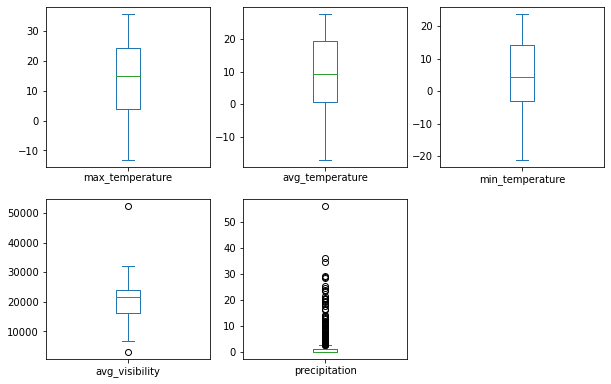

In [86]:
#avg temperature
weather.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

#### the outliers for precipitation make sense because there are not a lot of days with recorded precipitaton

## 3 Merging with delays dataset

In [87]:
df.head()

,Date,Time,Day,Incident,Min Delay,Min Gap,Fleet,stop_name,Route,ward_name,ward_population,ward_median_age,ward_median_income,n_poi,n_schools,n_worship,dist_to_nearest_station,n_stations,n_stops,n_stops_route
0,1/1/21,04:26,Friday,Emergency Services,0,0,1553,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,118800.0,38.5,61189.0,3.0,64.0,41.0,0.015798,33.0,291,133
1,1/1/21,05:04,Friday,Mechanical,10,0,8144,STRACHAN AVE AT CANNIFF ST,63,Spadina-Fort York,115510.0,32.4,75825.0,54.0,28.0,24.0,0.023542,18.0,205,57
2,1/1/21,05:34,Friday,Mechanical,24,48,8365,949 WILSON AVE,96,York Centre,104320.0,40.8,61725.0,1.0,45.0,73.0,0.023462,38.0,453,163
3,1/1/21,05:44,Friday,Emergency Services,15,30,8181,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,118800.0,38.5,61189.0,3.0,64.0,41.0,0.015798,33.0,291,133
4,1/1/21,06:21,Friday,Vision,30,60,3186,JANE STATION,35,Parkdale-High Park,108805.0,38.4,65546.0,5.0,42.0,73.0,0.000000,25.0,306,113


In [88]:
#merging datasets using inner join with date as key
df2=df.merge(weather, how='inner', left_on='Date', right_on='date')

In [89]:
df2.head()

,Date,Time,Day,Incident,Min Delay,Min Gap,Fleet,stop_name,Route,ward_name,...,dist_to_nearest_station,n_stations,n_stops,n_stops_route,date,max_temperature,avg_temperature,min_temperature,avg_visibility,precipitation
0,1/1/21,04:26,Friday,Emergency Services,0,0,1553,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,...,0.015798,33.0,291,133,1/1/21,1.6,-1.24,-4.1,13250,8.0
1,1/1/21,05:04,Friday,Mechanical,10,0,8144,STRACHAN AVE AT CANNIFF ST,63,Spadina-Fort York,...,0.023542,18.0,205,57,1/1/21,1.6,-1.24,-4.1,13250,8.0
2,1/1/21,05:34,Friday,Mechanical,24,48,8365,949 WILSON AVE,96,York Centre,...,0.023462,38.0,453,163,1/1/21,1.6,-1.24,-4.1,13250,8.0
3,1/1/21,05:44,Friday,Emergency Services,15,30,8181,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,...,0.015798,33.0,291,133,1/1/21,1.6,-1.24,-4.1,13250,8.0
4,1/1/21,06:21,Friday,Vision,30,60,3186,JANE STATION,35,Parkdale-High Park,...,0.000000,25.0,306,113,1/1/21,1.6,-1.24,-4.1,13250,8.0


In [90]:
df2.shape

(72831, 26)

In [91]:
df2.isnull().sum()

Date                       0
Time                       0
Day                        0
Incident                   0
Min Delay                  0
Min Gap                    0
Fleet                      0
stop_name                  0
Route                      0
ward_name                  0
ward_population            0
ward_median_age            0
ward_median_income         0
n_poi                      0
n_schools                  0
n_worship                  0
dist_to_nearest_station    0
n_stations                 0
n_stops                    0
n_stops_route              0
date                       0
max_temperature            0
avg_temperature            0
min_temperature            0
avg_visibility             0
precipitation              0
dtype: int64

In [92]:
#dropping second date column
df2.drop(['date'], axis=1,inplace=True)

In [93]:
df2.drop(columns=['max_temperature','min_temperature'],inplace=True)

In [94]:
df2.describe()

,Min Delay,Min Gap,ward_population,ward_median_age,ward_median_income,n_poi,n_schools,n_worship,dist_to_nearest_station,n_stations,n_stops,n_stops_route,avg_temperature,avg_visibility,precipitation
count,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000
mean,19.465104,32.183864,110329.339602,39.420305,65012.245967,4.749626,46.049649,58.821216,0.013489,21.080941,387.291771,87.412805,8.635175,20192.537518,2.014947
std,45.521120,46.719532,7109.539201,2.240750,8981.027885,9.491477,11.073329,19.768268,0.016540,14.573863,83.019581,40.474175,10.895626,4692.771945,5.344693
min,0.000000,0.000000,94580.000000,32.400000,51204.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,6.000000,-17.100000,3200.000000,0.000000
25%,9.000000,17.000000,104320.000000,38.400000,59220.000000,1.000000,43.000000,43.000000,0.000000,5.000000,320.000000,57.000000,0.450000,16100.000000,0.000000
50%,11.000000,22.000000,110080.000000,40.000000,61725.000000,2.000000,45.000000,60.000000,0.006635,25.000000,400.000000,89.000000,8.450000,21700.000000,0.000000
75%,20.000000,38.000000,114395.000000,40.800000,70920.000000,5.000000,52.000000,73.000000,0.022993,33.000000,453.000000,113.000000,18.500000,24100.000000,1.000000
max,999.000000,999.000000,129080.000000,45.200000,87360.000000,54.000000,71.000000,88.000000,0.080353,59.000000,535.000000,182.000000,27.540000,52300.000000,56.000000


In [95]:
df2.shape

(72831, 23)

## 4 Aggregating Columns

In [96]:
#creating columns for stop delay count, route delay count, ward delay count, zone delay count, and day_delay count
df2['stop_delay_count'] = df2.groupby('stop_name')['stop_name'].transform('count')
df2['route_delay_count'] = df2.groupby('Route')['Route'].transform('count')
df2['ward_delay_count'] = df2.groupby('ward_name')['ward_name'].transform('count')
df2['day_delay_count'] = df2.groupby('Date')['Date'].transform('count')

In [97]:
df2.head()

,Date,Time,Day,Incident,Min Delay,Min Gap,Fleet,stop_name,Route,ward_name,...,n_stations,n_stops,n_stops_route,avg_temperature,avg_visibility,precipitation,stop_delay_count,route_delay_count,ward_delay_count,day_delay_count
0,1/1/21,04:26,Friday,Emergency Services,0,0,1553,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,...,33.0,291,133,-1.24,13250,8.0,350,558,2981,55
1,1/1/21,05:04,Friday,Mechanical,10,0,8144,STRACHAN AVE AT CANNIFF ST,63,Spadina-Fort York,...,18.0,205,57,-1.24,13250,8.0,29,1301,1720,55
2,1/1/21,05:34,Friday,Mechanical,24,48,8365,949 WILSON AVE,96,York Centre,...,38.0,453,163,-1.24,13250,8.0,297,1506,6068,55
3,1/1/21,05:44,Friday,Emergency Services,15,30,8181,YONGE ST AT STEELES AVE WEST SOUTH SIDE,320,Willowdale,...,33.0,291,133,-1.24,13250,8.0,350,558,2981,55
4,1/1/21,06:21,Friday,Vision,30,60,3186,JANE STATION,35,Parkdale-High Park,...,25.0,306,113,-1.24,13250,8.0,657,1578,2789,55


In [98]:
df2.columns

Index(['Date', 'Time', 'Day', 'Incident', 'Min Delay', 'Min Gap', 'Fleet',
       'stop_name', 'Route', 'ward_name', 'ward_population', 'ward_median_age',
       'ward_median_income', 'n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route',
       'avg_temperature', 'avg_visibility', 'precipitation',
       'stop_delay_count', 'route_delay_count', 'ward_delay_count',
       'day_delay_count'],
      dtype='object')

In [99]:
df2.shape

(72831, 27)

In [100]:
#locating nan values
dfnull=df2[df2.isnull().any(axis=1)]

In [101]:
dfnull.shape

(0, 27)

In [102]:
#exporting dataframe
df2.to_pickle(os.path.join(path, '02 Data','Prepared', 'final_dataset.pkl'))